Data shape: (70000, 784)
Labels shape: (70000,)
Missing values in data: 0
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0         0         0         0         0         0   
4        0  ...         0         0         0         0         0   

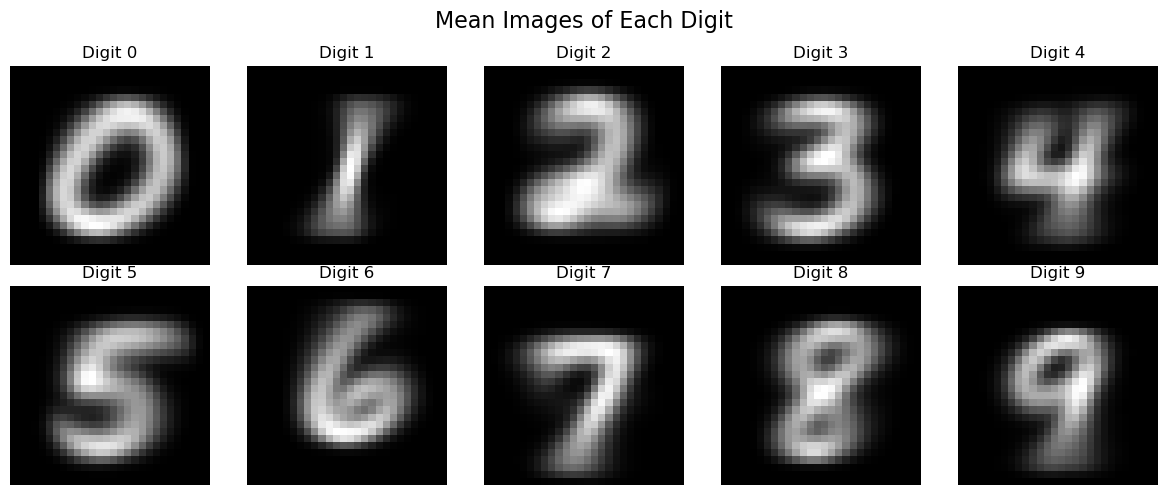

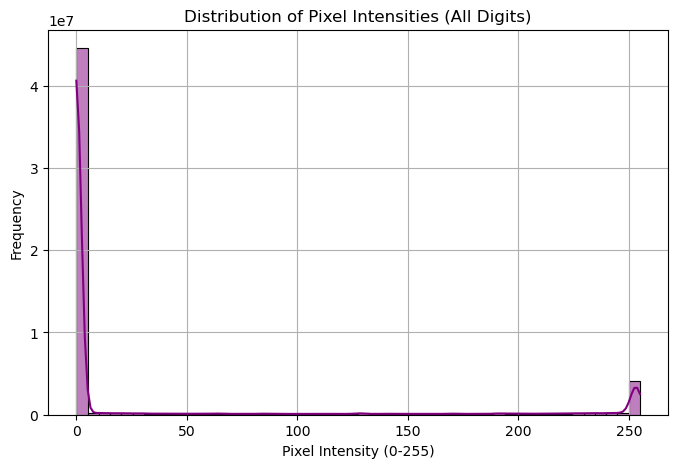

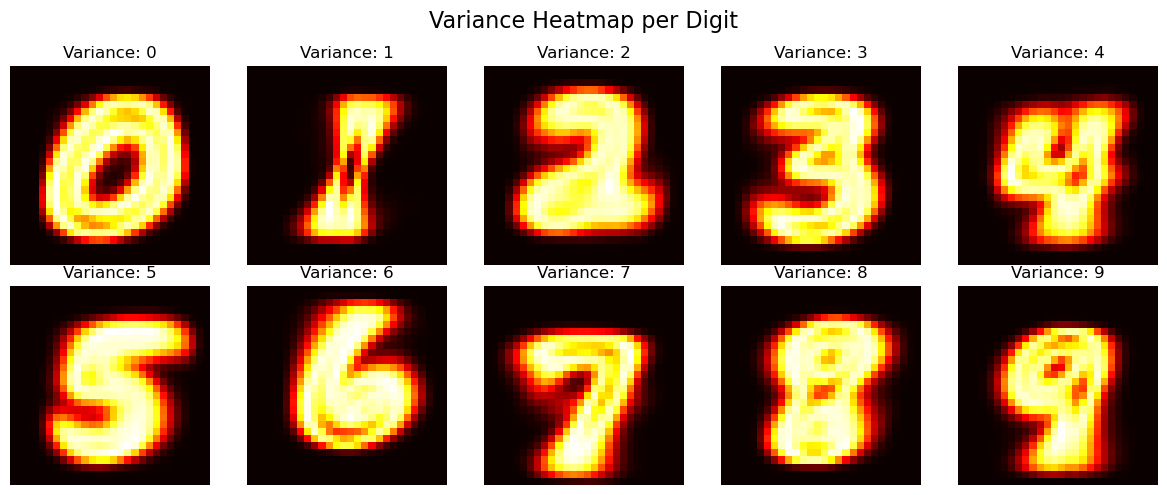

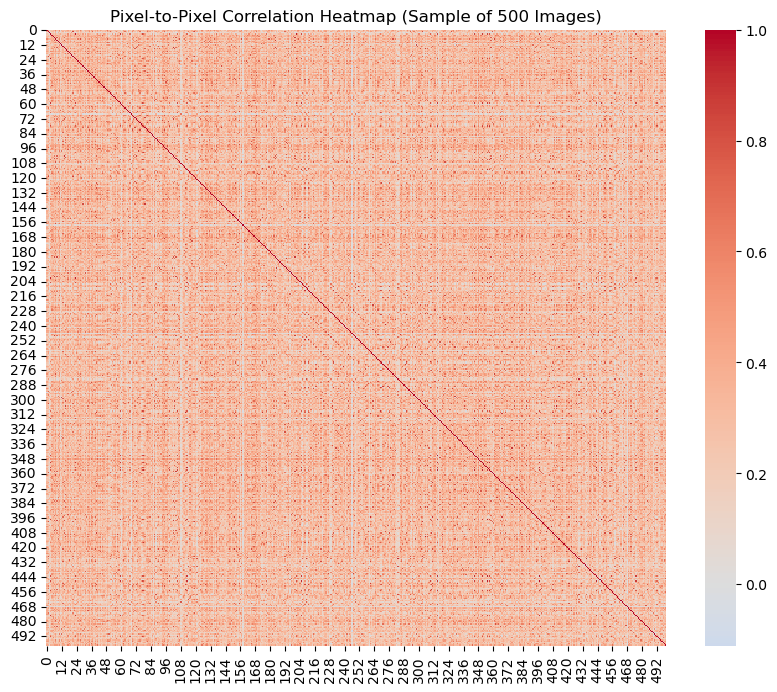

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

# Load the MNIST dataset (70,000 images of 28x28 grayscale digits)
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

print(f"Data shape: {X.shape}")     # (70000, 784) -> each image is flattened to 784 features
print(f"Labels shape: {y.shape}")   # (70000,)

# Check for any missing values
print("Missing values in data:", X.isnull().sum().sum())

# Show the first few rows of the dataset
print(X.head())

# -------------------------------
# 1. Mean Image for Each Digit
# -------------------------------
mean_images = X.groupby(y).mean()

# Plot average images for digits 0 to 9
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(mean_images.loc[i].values.reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Digit {i}")
    axes[i].axis('off')

plt.suptitle("Mean Images of Each Digit", fontsize=16)
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Pixel Intensity Distribution
# -------------------------------
# Plot distribution of pixel intensities (flattened)
plt.figure(figsize=(8, 5))
sns.histplot(X.values.flatten(), bins=50, kde=True, color='purple')
plt.title("Distribution of Pixel Intensities (All Digits)")
plt.xlabel("Pixel Intensity (0-255)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# -------------------------------
# 3. Variance of Pixels per Digit
# -------------------------------
# Helps identify how much variability exists in certain regions
variance_images = X.groupby(y).var()

# Plot variance images for each digit
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(variance_images.loc[i].values.reshape(28, 28), cmap='hot')
    axes[i].set_title(f"Variance: {i}")
    axes[i].axis('off')

plt.suptitle("Variance Heatmap per Digit", fontsize=16)
plt.tight_layout()
plt.show()

# -------------------------------
# 4. Correlation Heatmap of Pixels
# -------------------------------
# Use a subset of the data to compute pixel-to-pixel correlations
subset = X.iloc[:500]  # Sample to avoid heavy computation

# Compute correlation matrix
corr_matrix = subset.T.corr()

# Show heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Pixel-to-Pixel Correlation Heatmap (Sample of 500 Images)")
plt.show()
